In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import cmocean.cm as cmo

In [42]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .25
mpl.rcParams['figure.subplot.top']    = .85
mpl.rcParams['figure.subplot.left']   = .1
mpl.rcParams['figure.subplot.right']  = .8
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,2.5

In [43]:
var = ['sterodyn.','glacier','Gr. SMB','Ant. SMB','Ant. dyn.']
ar5r = np.array(
    [[1,0,1,1,0],
    [0,1,0,0,0],
    [1,0,1,1,0],
    [1,0,1,1,0],
    [0,0,0,0,1]])
ar5g = {}
ar5g['rcp45'] = np.array(
    [[1,.68,.68,-.57,-.05],
    [.68,1,.43,-.43,-.05],
    [.68,.43,1,-.43,-.05],
    [-.57,-.43,-.43,1,.18],
    [-.05,-.05,-.05,.18,1]])
ar5g['rcp85'] = np.array(
    [[1,.57,.57,-.57,-.05],
    [.57,1,.18,-.33,-.05],
    [.57,.18,1,-.33,-.05],
    [-.57,-.33,-.33,1,.18],
    [-.05,-.05,-.05,.18,1]])

this = {}
this['rcp45'] = np.array(
    [[1,.35,.39,-.23,-.05],
    [.35,1,.45,-.44,-.06],
    [.39,.45,1,-.60,-.25],
    [-.23,-.44,-.60,1,.3],
    [-.05,-.06,-.25,.3,1]])
this['rcp85'] = np.array(
    [[1,.36,.25,-.22,-.02],
    [.36,1,.43,-.41,.04],
    [.25,.43,1,-.72,-.30],
    [-.22,-.41,-.72,1,.23],
    [-.02,.04,-.30,.23,1]])

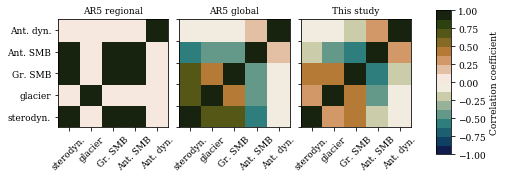

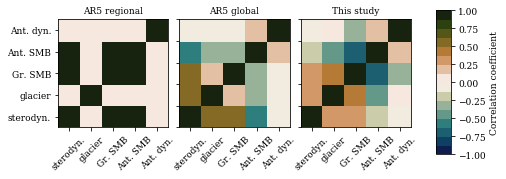

In [44]:
cmap = plt.get_cmap('cmo.tarn_r',16)
x = np.arange(0,6)
    
for s,scen in enumerate(['rcp45','rcp85']):
    fig = plt.figure()
    
    ax = fig.add_subplot(1,3,1)
    im = ax.pcolormesh(x,x,ar5r,cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('AR5 regional')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticks(x+.5)
    ax.set_yticklabels(var)
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    ax = fig.add_subplot(1,3,2)
    im = ax.pcolormesh(x,x,ar5g[scen],cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('AR5 global')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticklabels([])
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    ax = fig.add_subplot(1,3,3)
    im = ax.pcolormesh(x,x,this[scen],cmap=cmap,vmin=-1,vmax=1)
    ax.set_title('This study')
    ax.set_xticks(x+.5)
    ax.set_xticklabels(var,rotation=45)
    ax.set_yticklabels([])
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    
    cax = fig.add_axes([.85,.1,.03,.8])
    cb = plt.colorbar(im,cax=cax)
    cb.set_label('Correlation coefficient')
    
    figname = f'draftplot_correlations_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()      